In [2]:
import torch
import torch.nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

import matplotlib.pyplot as plt


#### <Mnist 데이터셋>
- Modified National Institute of Standards and Technology의 약자
- 머신러닝의 잘 알려진 데이터셋 중 하나
- NIST의 인구조사국 직원과 미국 중고등학생의 손글씨로 쓴 숫자 이미지 데이터
- Train Samples : 60,000 장  
  Test Samples  : 10,000 장
- 흑백이미지(Gray Scale) 데이터로 0~255(0:블랙, 255:화이트)의 값으로 구성되어있음
- 이미지 사이즈는 28x28 = 784

- 이미지 데이터는 숫자로 표현

- torchvision.datasets.MINIST: 개별 데이터를 특정하는 함수 구현
  - 이러한 데이터셋은 모델을 만들어보고 성능을 측정하는데 사용 가능

In [3]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform = transforms.ToTensor(), download=True )



test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform = transforms.ToTensor(), download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
batch_size= 100

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=True)


torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.

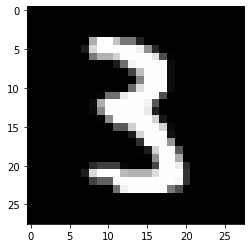

In [11]:
for i, data in enumerate(train_loader):
  x,y = data
  print(y.shape) # batch_size=100개
  print(x.shape)
  print(x[0].shape)
  print(x[0])
  plt.imshow(x[0][0].reshape(28,28), cmap='gray')
  print(y[0])
  break

# Model

In [14]:
class MLP_model(torch.nn.Module):
  def __init__(self, input_size, num_classes):
    super(MLP_model, self).__init__()
    self.input_size = input_size
    self.num_classes = num_classes
    self.fc1 = torch.nn.Linear(input_size, 256)
    self.fc2 = torch.nn.Linear(256,256)
    self.fc3 = torch.nn.Linear(256, num_classes)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()


  def forward(self, x):

    fc1 = self.fc1(x)
    ac1 = self.relu(fc1)

    fc2 = self.fc2(ac1)
    ac2 = self.relu(fc2)

    output = self.fc3(ac2)

    return output

In [15]:
# Hyperparameters

input_size = 784 # 이미지 한 장은 28*28 픽셀로 이루어짐 
num_classes = 10
num_epochs = 5
learning_rate = 0.1

In [17]:
model = MLP_model(input_size, num_classes)

In [18]:
# Loss Function, Optimizer

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training

In [23]:
train_loss = []

for epoch in range(1, num_epochs+1):

  for i, (x_batch, y_batch) in enumerate(train_loader): #x_batch: 이미지 데이터 / y_batch: 레이블 값
    
    optimizer.zero_grad()

    x_batch = x_batch.reshape(-1, 28*28)

    output = model(x_batch)
    
    loss = criterion(output, y_batch)

    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

    if (i+1)%200 == 0:
      print("epoch:{}, iter={}, Loss_train: {:.2f}".format(epoch, i+1, train_loss[-1]))

epoch:1, iter=200, Loss_train: 0.37
epoch:1, iter=400, Loss_train: 0.36
epoch:1, iter=600, Loss_train: 0.31
epoch:2, iter=200, Loss_train: 0.44
epoch:2, iter=400, Loss_train: 0.17
epoch:2, iter=600, Loss_train: 0.30
epoch:3, iter=200, Loss_train: 0.18
epoch:3, iter=400, Loss_train: 0.08
epoch:3, iter=600, Loss_train: 0.10
epoch:4, iter=200, Loss_train: 0.10
epoch:4, iter=400, Loss_train: 0.22
epoch:4, iter=600, Loss_train: 0.13
epoch:5, iter=200, Loss_train: 0.11
epoch:5, iter=400, Loss_train: 0.04
epoch:5, iter=600, Loss_train: 0.09


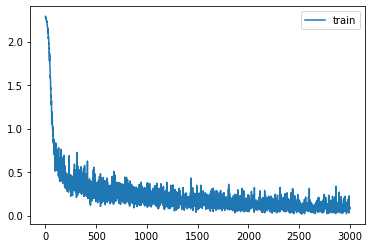

In [24]:
plt.figure()
plt.plot(train_loss, label='train')
plt.legend(loc = 'upper right')
plt.show()

# Validation

In [26]:
with torch.no_grad():
  correct = 0
  total = 0

  for i, (x_test, y_test) in enumerate(test_loader):

    x_test = x_test.reshape(-1, 28*28)

    outputs = model(x_test)
    outputs_softmax = F.softmax(outputs, dim=1)  ## softmax 함수: 가장 큰 값, 그 값의 index ## dim=1; dimension 1을 기준으로

    predicted = torch.argmax(outputs_softmax.data, dim=1) # 총 label의 갯수
    total += y_test.size(0)
    correct += (predicted==y_test).sum().item()

    # predicted = y_test --> True로 반환, True는 1을 의미
    # 재귀 합을 통해 정답 맞춘 횟수를 count

    accuracy = 100*(correct/total)

    print("Accuracy of test images: {:.2f} %".format(accuracy))

Accuracy of test images: 97.00 %
Accuracy of test images: 97.50 %
Accuracy of test images: 97.67 %
Accuracy of test images: 97.50 %
Accuracy of test images: 97.40 %
Accuracy of test images: 97.33 %
Accuracy of test images: 97.57 %
Accuracy of test images: 97.25 %
Accuracy of test images: 97.22 %
Accuracy of test images: 97.00 %
Accuracy of test images: 97.00 %
Accuracy of test images: 97.17 %
Accuracy of test images: 97.08 %
Accuracy of test images: 97.14 %
Accuracy of test images: 97.13 %
Accuracy of test images: 97.19 %
Accuracy of test images: 97.12 %
Accuracy of test images: 96.89 %
Accuracy of test images: 96.79 %
Accuracy of test images: 96.75 %
Accuracy of test images: 96.76 %
Accuracy of test images: 96.82 %
Accuracy of test images: 96.70 %
Accuracy of test images: 96.79 %
Accuracy of test images: 96.84 %
Accuracy of test images: 96.88 %
Accuracy of test images: 96.85 %
Accuracy of test images: 96.89 %
Accuracy of test images: 96.93 %
Accuracy of test images: 96.97 %
Accuracy o